# Exploratory Data Analysis with Pandas (part 3)

Let us continue with the exploratory data analysis with Pandas. We will continue with the titanic dataset. So, load the titanic dataset and remember its structure.

In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_bokeh

pandas_bokeh.output_notebook()
%matplotlib inline

Loading BokehJS ...

Load the titanic dataset.

In [2]:
df_titanic = pd.read_excel('./data/titanic/Titanic.xls')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY"


## Data types in Pandas

Pandas has a `dtypes` attribute that returns the data types of the columns in the data frame. Possible data types include `int64`, `float64`, `object`, `bool`, `datetime64`, `timedelta[ns]`, and `category`. By default, the data types are inferred from the data. If the data type is numeric, numpy data types are used. If the data type is non-numeric, the data type is inferred as `object`. The `object` data type is used for string values and for other mixed data types. (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes for more details)

For example, let us check the data types of the titanic dataset.

In [3]:
df_titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Which can be also visualized as follows:

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


We can get the data types of a specific column using the `dtype` attribute.

In [5]:
df_titanic['survived'].dtype

dtype('int64')

And get all columns of a specific data type using the `select_dtypes` method.

In [6]:
# Such as all columns of type `int64`.
df_titanic.select_dtypes(include=['int64'])

,pclass,survived,sibsp,parch
0,1,1,0,0
1,1,1,1,0
2,1,1,1,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
1304,3,0,1,0
1305,3,0,1,0
1306,3,0,0,0
1307,3,0,0,0


In [7]:
# Or all columns of type `float64`.
df_titanic.select_dtypes(include=['float64'])

,age,fare,body
0,29.0,211.3375,NaN
1,48.0,39.6000,NaN
2,49.0,56.9292,NaN
3,30.0,56.9292,NaN
4,NaN,26.0000,NaN
...,...,...,...
1304,14.5,14.4542,328.0
1305,NaN,14.4542,NaN
1306,26.5,7.2250,304.0
1307,27.0,7.2250,NaN


In [8]:
# all columns of type `object`.
df_titanic.select_dtypes(include=['object'])

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,11755,A16,C,1,London / Paris
2,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,PC 17485,A20,C,1,London / Paris
3,"Francatelli, Miss. Laura Mabel",female,PC 17485,E36,C,1,NaN
4,"Salomon, Mr. Abraham L",male,111163,NaN,S,1,"New York, NY"
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,2665,NaN,C,NaN,NaN
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN


In [9]:
# get all numeric columns
df_titanic.select_dtypes(include=['number'])

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0,0,0,211.3375,NaN
1,1,1,48.0,1,0,39.6000,NaN
2,1,1,49.0,1,0,56.9292,NaN
3,1,1,30.0,0,0,56.9292,NaN
4,1,1,NaN,0,0,26.0000,NaN
...,...,...,...,...,...,...,...
1304,3,0,14.5,1,0,14.4542,328.0
1305,3,0,NaN,1,0,14.4542,NaN
1306,3,0,26.5,0,0,7.2250,304.0
1307,3,0,27.0,0,0,7.2250,NaN


The conversion of the data types can be done using the `astype` method. For example, let us convert the `survived` feature to `bool`.

In [10]:
# copy the data frame
df = df_titanic.copy()

# convert the survived feature to bool
df['survived'] = df['survived'].astype(bool)

# check the data types
df.dtypes

pclass         int64
survived        bool
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Looking at the results, we can see that the `survived` feature is now of type `bool`, i.e., `True` and `False`.

In [11]:
df['survived']

0        True
1        True
2        True
3        True
4        True
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

Other transformations are natural such as converting the `embarked` and `sex` feature to `category`, as follows:

In [12]:
df['embarked_category'] = df['embarked'].astype('category')
df['sex_category'] = df['sex'].astype('category')
df.dtypes

pclass                  int64
survived                 bool
name                   object
sex                    object
age                   float64
sibsp                   int64
parch                   int64
ticket                 object
fare                  float64
cabin                  object
embarked               object
boat                   object
body                  float64
home.dest              object
embarked_category    category
sex_category         category
dtype: object

This does not change the values of the feature, but it changes the data type, the `pclass` feature is now of type `category`.

In [13]:
df[['embarked_category', 'sex_category']]

,embarked_category,sex_category
0,S,female
1,C,female
2,C,male
3,C,female
4,S,male
...,...,...
1304,C,female
1305,C,female
1306,C,male
1307,C,male


The `pcalss` feature can also be considered as a categorical feature. Let us convert it to `category` data type.

In [14]:
df['pclass_category'] = df['pclass'].astype('category')

This is useful for performance reasons, as in some cases, the `category` data type is more efficient than `object` data type. For example, let us compare the performance of the `category` and `object` data types when counting the number of unique values.

In [15]:
def timeit_cat_vs_other(df, feature):
    print()
    feature_category = f'{feature}_category'
    print(f'Time to count the number of unique values in the {feature} feature (dtype = {df[feature].dtype}) vs. {df[feature_category].dtype})')
    %timeit df[feature].nunique()
    %timeit df[feature_category].nunique()

timeit_cat_vs_other(df, 'sex')

timeit_cat_vs_other(df, 'embarked')

timeit_cat_vs_other(df, 'pclass')


Time to count the number of unique values in the sex feature (dtype = object) vs. category)
39.8 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
19.4 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Time to count the number of unique values in the embarked feature (dtype = object) vs. category)
29.1 µs ± 946 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
19.4 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Time to count the number of unique values in the pclass feature (dtype = int64) vs. category)
16 µs ± 39.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19.4 µs ± 55.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Also in terms of memory usage, the `category` data type is more efficient than `object` data type.

In [16]:
df[['embarked', 'embarked_category', 'sex', 'sex_category', 'pclass', 'pclass_category']].memory_usage(deep=True)

Index                  128
embarked             75870
embarked_category     1591
sex                  80781
sex_category          1541
pclass               10472
pclass_category       1441
dtype: int64

Transformations of categorical columns can also have significant impact on the performance of machine learning algorithms.

In [18]:
print('Time to convert the sex feature to upper case')
%timeit df['sex'].str.upper()
%timeit df['sex_category'].str.upper()

print()
print('Time to convert the embarked feature to upper case')
%timeit df['embarked'].str.upper()
%timeit df['embarked_category'].str.upper()

Time to convert the sex feature to upper case
147 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
40.4 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Time to convert the embarked feature to upper case
144 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
40.2 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
df['sex'].str.upper()

0       FEMALE
1       FEMALE
2         MALE
3       FEMALE
4         MALE
         ...  
1304    FEMALE
1305    FEMALE
1306      MALE
1307      MALE
1308      MALE
Name: sex, Length: 1309, dtype: object

For other operations the `category` data type is not more efficient than `object` data type. For example, let us compare the performance of the `category`, `object` and `int64` a data types when counting the number of occurrences of each value.

In [21]:
print('Time to count the number of occurrences of each value in the embarked feature')
%timeit df['embarked'].value_counts()
%timeit df['embarked_category'].value_counts()

print()
print('Time to count the number of occurrences of each value in the pclass feature')
%timeit df['pclass'].value_counts()
%timeit df['pclass_category'].value_counts()

Time to count the number of occurrences of each value in the embarked feature
84.2 µs ± 852 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
96.4 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Time to count the number of occurrences of each value in the pclass feature
57.2 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
95.9 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Or when doing a group by operation.

In [23]:
print('Time to group by the embarked feature')
%timeit df.groupby('embarked').size()
%timeit df.groupby('embarked_category').size()

print()
print('Time to group by pclass feature')
%timeit df.groupby('pclass').size()
%timeit df.groupby('pclass_category').size()

Time to group by the embarked feature
142 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
104 µs ± 999 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Time to group by pclass feature
103 µs ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
107 µs ± 4.46 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


So, the conversion of the data types can have significant impact on the performance. In general, the `category` data type is more efficient than `object` data type, but not always. This must be evaluated on a case by case basis.

## Feature encoding
Feature encoding is the process of transforming the features to have a more machine learning friendly format. For example, categorical features are transformed to have integer values. This is useful for some machine learning algorithms.

### One-hot encoding

One-hot encoding is the process of transforming the features to have a more machine learning friendly format. For example, categorical features are split into multiple binary features.

In [27]:
df = df_titanic.copy()
encoded_data = pd.get_dummies(df[['embarked', 'sex']],
                              dtype=int # default is bool
)

encoded_data

,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,0,1,1,0
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,1,0
4,0,0,1,0,1
...,...,...,...,...,...
1304,1,0,0,1,0
1305,1,0,0,1,0
1306,1,0,0,0,1
1307,1,0,0,0,1


In [28]:
# add the encoded data to the original data frame and drop the original features
df = pd.concat([df, encoded_data], axis=1).drop(['embarked', 'sex'], axis=1)
df

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",0,0,1,1,0
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",48.0,1,0,11755,39.6000,A16,1,NaN,London / Paris,1,0,0,1,0
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",49.0,1,0,PC 17485,56.9292,A20,1,NaN,London / Paris,1,0,0,0,1
3,1,1,"Francatelli, Miss. Laura Mabel",30.0,0,0,PC 17485,56.9292,E36,1,NaN,NaN,1,0,0,1,0
4,1,1,"Salomon, Mr. Abraham L",NaN,0,0,111163,26.0000,NaN,1,NaN,"New York, NY",0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5,1,0,2665,14.4542,NaN,NaN,328.0,NaN,1,0,0,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,NaN,NaN,NaN,1,0,0,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5,0,0,2656,7.2250,NaN,NaN,304.0,NaN,1,0,0,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0,0,0,2670,7.2250,NaN,NaN,NaN,NaN,1,0,0,0,1


### Label encoding
Label encoding is the process of transforming the features to have a more machine learning friendly format. For example, categorical features are transformed to have integer values.

Let us encode the `embarked` feature.

In [32]:
from sklearn.preprocessing import LabelEncoder

# copy the data frame
df = df_titanic.copy()

# encode the embarked feature
le = LabelEncoder()
df['embarked'] = le.fit_transform(df['embarked'])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,0,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,0,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,0,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,2,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,0,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,0,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,0,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,0,NaN,NaN,NaN


The `LabelEncoder` class has a `classes_` attribute that contains the list of classes that were encoded.

In [35]:
le.classes_

array(['C', 'Q', 'S', nan], dtype=object)

As an alternative to `LabelEncoder`, for categorial features we cn use the `cat.codes` accessor.

In [49]:
df = df_titanic.copy()
df['embarked'] = df['embarked'].astype('category')
df['embarked'] = df['embarked'].cat.codes
df['embarked']

0       2
1       0
2       0
3       0
4       2
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Name: embarked, Length: 1309, dtype: int8

In [48]:
df['embarked'].astype('category').cat.categories

Index(['C', 'Q', 'S'], dtype='object')

### Ordinal encoding

Ordinal encoding is similar to label encoding, but the classes are ordered. For example, the classes `low`, `medium`, and `high` can be encoded as `0`, `1`, and `2`, respectively.

## Feature scaling

In practical scenarios, features often have distinct ranges, magnitudes, and units. For instance, age may vary between 0 and 120, while salary can fluctuate between zero and thousands or even millions. This raises the question of how data analysts or scientists can compare such features, given that they are on different scales. It is worth noting that high-magnitude features tend to have a more significant impact on machine learning models than lower magnitude ones. Fortunately, feature scaling or normalization can help address these issues.

So, feature scaling refers to the process of bringing all features to the same magnitude level. It is not mandatory for all algorithms, but some algorithms necessitate scaled data, such as those that depend on Euclidean distance measures, like K-nearest neighbor and K-means clustering algorithms.

<Axes: >

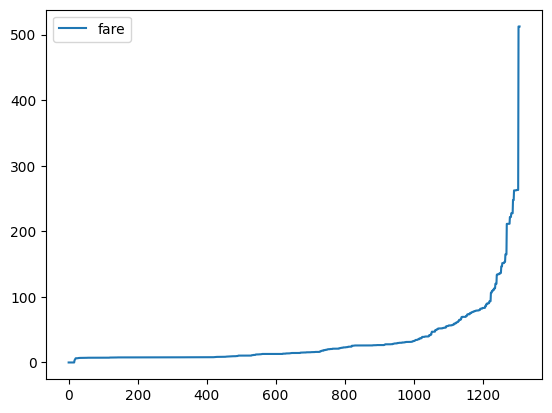

In [54]:
df['fare'].sort_values().reset_index().drop('index', axis=1).plot()

### Standard scaling
Standard scaling is the process of transforming the features to have a more normal distribution. The standard scaling is performed by subtracting the mean and dividing by the standard deviation., i.e., $$x_{scaled} = \frac{x - \mu}{\sigma}$$

In [65]:
from sklearn.preprocessing import StandardScaler

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# standard scaling
scaler = StandardScaler()
scaler.fit(df[features])


df[features] = scaler.transform(df[features])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,-0.061162,0,0,24160,3.441165,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,1.257677,1,0,11755,0.121853,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,1.327090,1,0,PC 17485,0.456788,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,0.008251,0,0,PC 17485,0.456788,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,-0.141006,NaN,S,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,-1.067644,1,0,2665,-0.364161,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,-0.364161,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,-0.234693,0,0,2656,-0.503886,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,-0.199987,0,0,2670,-0.503886,NaN,C,NaN,NaN,NaN


In [66]:
scaler.transform([[14, 100], [43, 10]])


/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.10235069,  1.2892533 ],
       [ 0.91061444, -0.45025095]])

<Axes: title={'center': 'standard scaled data'}, ylabel='Frequency'>

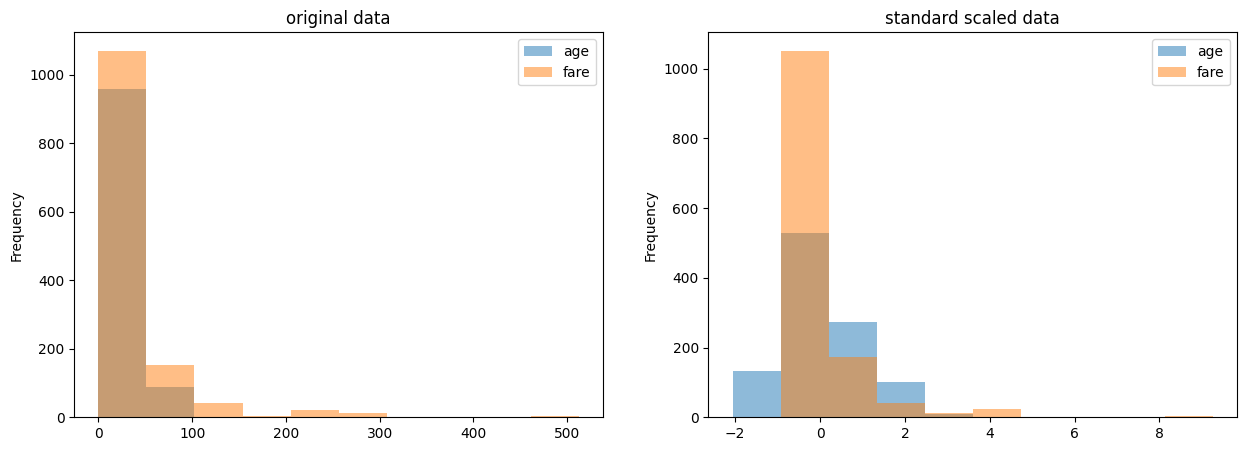

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=10, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=10, title='standard scaled data', ax=ax[1])

### Min-max scaling

Min-max scaling is the process of transforming the features to have a more uniform distribution. The min-max scaling to the [0, 1] interval is performed by subtracting the minimum and dividing by the range., i.e., $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}.$$

To transform the data to the $[a, b]$ interval, we can use the following formula: $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}  (b - a) + a.$$

In [70]:
from sklearn.preprocessing import MinMaxScaler

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# min-max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,0.361169,0,0,24160,0.412503,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,0.599165,1,0,11755,0.077294,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,0.611691,1,0,PC 17485,0.111118,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,0.373695,0,0,PC 17485,0.111118,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,0.050749,NaN,S,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,0.179540,1,0,2665,0.028213,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,0.028213,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,0.329854,0,0,2656,0.014102,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,0.336117,0,0,2670,0.014102,NaN,C,NaN,NaN,NaN


<Axes: title={'center': 'min-max scaled data'}, ylabel='Frequency'>

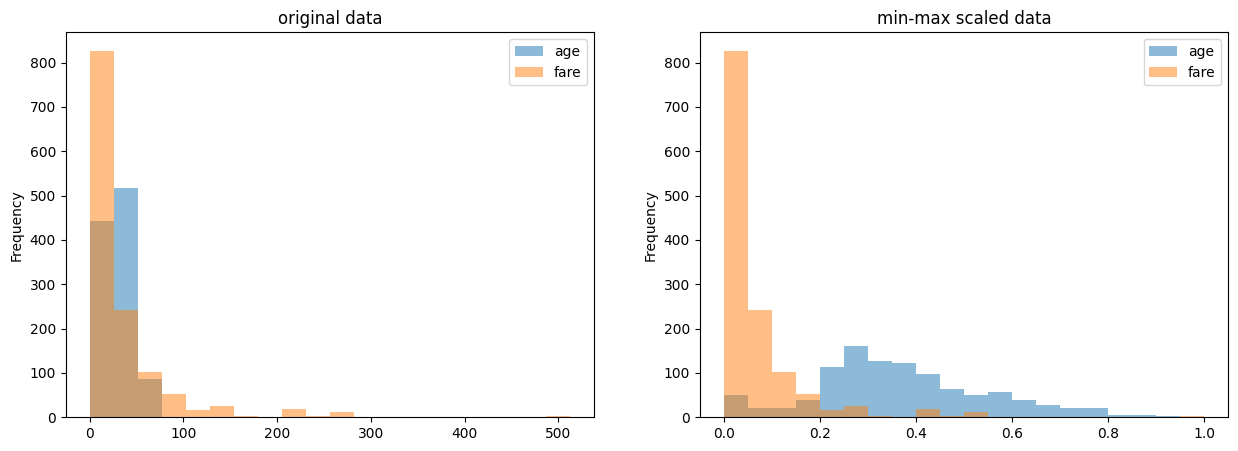

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='min-max scaled data', ax=ax[1])

### Robust scaling
Robust scaling features in a way that accounts for outliers. The method achieves this by first removing the median and then scaling the data based on the quantile range. The default quantile range used is the Interquartile Range (IQR), although it can be customized if needed.

During the scaling process, each feature is centered and scaled independently by computing relevant statistics from the training set. Outliers can often skew the sample mean and variance in undesirable ways.

So, robust scaling is computed as follows:
 $$x_{scaled} = \frac{x - \text{median}(x)}{\text{IQR}(x)},$$
where $\text{median}(x)$ is the median of the feature $x$, and $\text{IQR}(x)$ is the interquartile range of the feature $x$.

In [72]:
from sklearn.preprocessing import RobustScaler

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# robust scaling
scaler = RobustScaler()
df[features] = scaler.fit_transform(df[features])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,0.055556,0,0,24160,8.421302,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,1.111111,1,0,11755,1.075563,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,1.166667,1,0,PC 17485,1.816786,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,0.111111,0,0,PC 17485,1.816786,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,0.493849,NaN,S,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,-0.750000,1,0,2665,0.000000,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,0.000000,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,-0.083333,0,0,2656,-0.309215,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,-0.055556,0,0,2670,-0.309215,NaN,C,NaN,NaN,NaN


<Axes: title={'center': 'robust scaled data'}, ylabel='Frequency'>

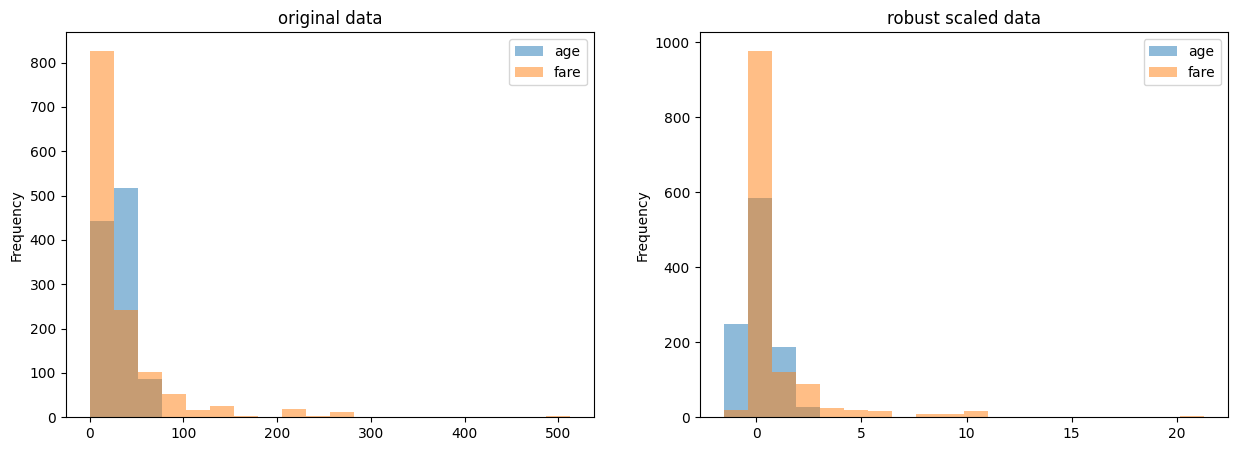

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='robust scaled data', ax=ax[1])

## Feature transformation
Feature transformation is the process of transforming the features allows, for exameple, reducing the skewness of the features, the effect of outliers, etc. Examples feature transformations are log transformation, square root transformation, square, etc.

If the feature is right-skewed or positively skewed or grouped at lower values, then we can apply the square root, cube root, and logarithmic transformations, while if the feature is left-skewed or negative skewed or grouped at higher values, then we can apply the cube, square, and so on.

### Log transformation

The log transformation is performed by taking the logarithm of the feature., i.e., $$x_{log} = \log(x).$$

In [74]:
from scipy import stats

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# log transformation
df[features] = df[features].apply(lambda x: np.log(x + 1))

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,3.401197,0,0,24160,5.358177,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,3.891820,1,0,11755,3.703768,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,3.912023,1,0,PC 17485,4.059222,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,3.433987,0,0,PC 17485,4.059222,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,3.295837,NaN,S,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,2.740840,1,0,2665,2.737881,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,2.737881,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,3.314186,0,0,2656,2.107178,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,3.332205,0,0,2670,2.107178,NaN,C,NaN,NaN,NaN


<Axes: title={'center': 'log scaled data'}, ylabel='Frequency'>

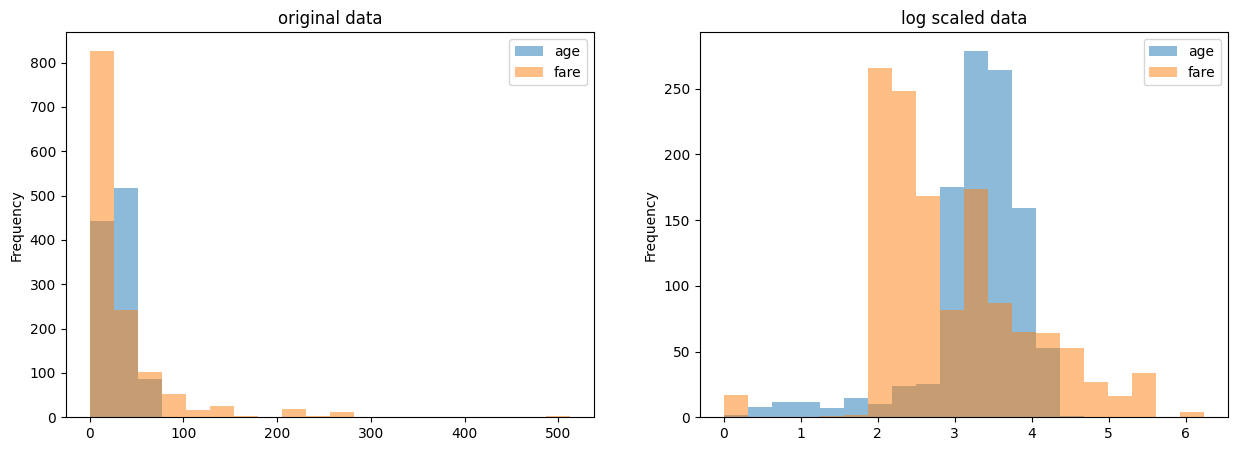

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='log scaled data', ax=ax[1])

### Square root transformation
Square root transformation is performed by taking the square root of the feature., i.e., $$x_{sqrt} = \sqrt{x}.$$

In [76]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# square transformation
df[features] = df[features].apply(lambda x: np.sqrt(x))

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,5.385165,0,0,24160,14.537452,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,6.928203,1,0,11755,6.292853,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,7.000000,1,0,PC 17485,7.545144,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,5.477226,0,0,PC 17485,7.545144,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,5.099020,NaN,S,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,3.807887,1,0,2665,3.801868,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,3.801868,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,5.147815,0,0,2656,2.687936,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,5.196152,0,0,2670,2.687936,NaN,C,NaN,NaN,NaN


<Axes: title={'center': 'log scaled data'}, ylabel='Frequency'>

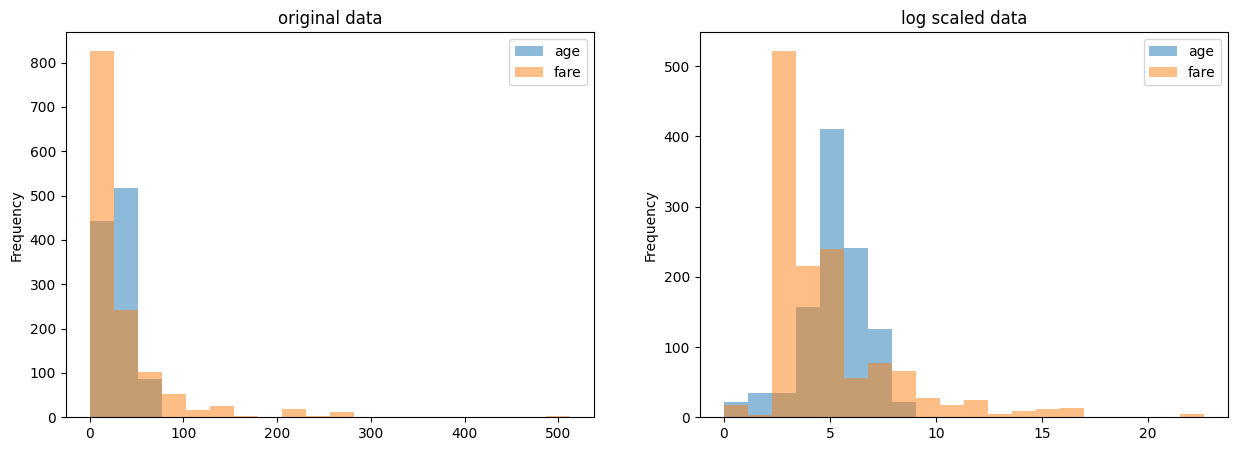

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='log scaled data', ax=ax[1])

### Discretization transformation
Discretization transformation is performed by transforming numerical features to categorical features. This is useful for some machine learning algorithms. For example, the following code transforms the age feature to a categorical feature.

To do this, we use the `pd.cut` function. The `pd.cut` function takes as input the feature to be transformed, the bins, and the labels. The bins are the intervals in which the feature will be transformed. The labels are the names of the categories.

In [81]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# discretization transformation
df['age category'] = pd.cut(df['age'], bins=[0, 18, 30, 65, 100], labels=['child', 'young', 'adult', 'senior'])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age category
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris,adult
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,adult
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN,young
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,child
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,young
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,young


<Axes: xlabel='age category'>

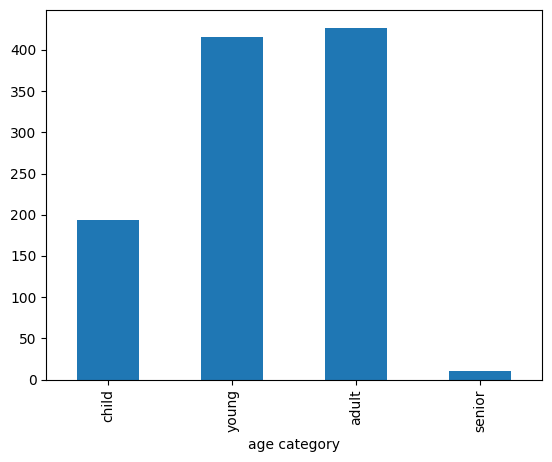

In [90]:
df.groupby('age category')['age'].count().plot.bar()

## Feature splitting
Feature splitting is the process of splitting a feature into multiple features. For example, some times is possible to split the `name` feature into two features: `first name` and `last name`. Or the spliting of a `date` feature into three features: `year`, `month`, and `day`.

In the Titanic dataset, we can split the cabin feature into two features: `cabin number` and `cabin letter`. The latter corresponds to the deck of the Titanic. Furhter, some passenger have more than one cabin. In this case, we can split the cabin feature into multiple features, one for each cabin.

In [91]:
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [94]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['cabin']

# feature splitting
df['cabin number'] = df['cabin'].str.extract('([0-9]+)')
df['deck'] = df['cabin'].str.extract('([A-Z])')
df['number of cabins'] = df['cabin'].str.split().str.len()

df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin number,deck,number of cabins
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",5,B,1.0
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0000,1,0,11755,39.6000,A16,C,1,NaN,London / Paris,16,A,1.0
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0000,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,20,A,1.0
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0000,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN,36,E,1.0
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY",NaN,NaN,NaN
5,1,1,"Stengel, Mr. Charles Emil Henry",male,54.0000,1,0,11778,55.4417,C116,C,1,NaN,"Newark, NJ",116,C,1.0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",7,D,1.0
7,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0000,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB",23,C,3.0
8,1,1,"Fortune, Miss. Ethel Flora",female,28.0000,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB",23,C,3.0
9,1,1,"Fortune, Miss. Mabel Helen",female,23.0000,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB",23,C,3.0


And now it can be interesting to see the distribution of the passenger class in different decks. This can be done using the `groupby` function and the `unstack` function.

In [102]:
df.groupby('deck')['pclass'].value_counts().unstack()

pclass,1,2,3
deck,,,
A,22.0,NaN,NaN
B,65.0,NaN,NaN
C,94.0,NaN,NaN
D,40.0,6.0,NaN
E,34.0,4.0,3.0
F,NaN,13.0,8.0
G,NaN,NaN,5.0
T,1.0,NaN,NaN


<Axes: xlabel='deck'>

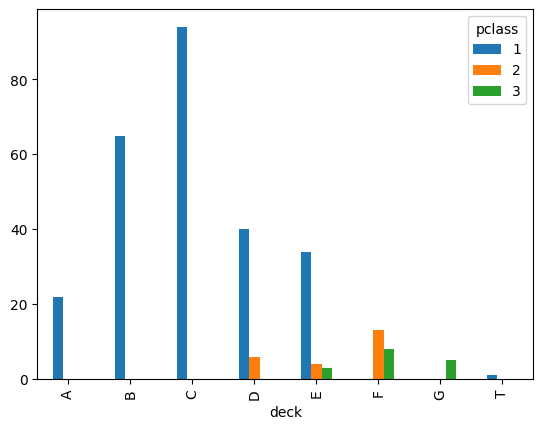

In [100]:
df.groupby('deck')['pclass'].value_counts().unstack().plot.bar()

Or we can see the distribution of the passenger class in different decks using the `pivot_table` function.

<Axes: xlabel='deck'>

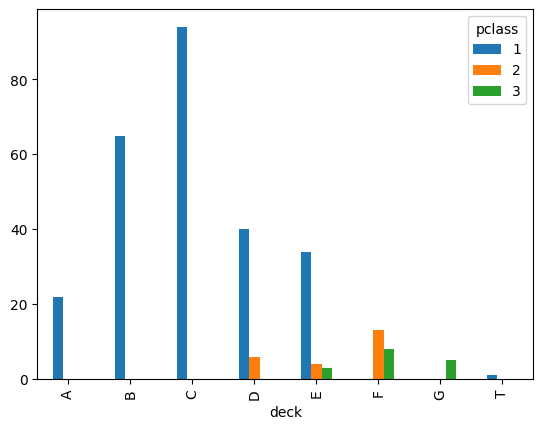

In [108]:
df.pivot_table(index='deck', columns='pclass', aggfunc='size', fill_value=0).plot.bar()

Another thing we can check is the correlation between the number of cabins and the passenger class or the fare. We can see that the number of cabins is highly correlated fare but not with the passenger class.

In [111]:
df[['number of cabins', 'pclass', 'fare']].corr()

,number of cabins,pclass,fare
number of cabins,1.000000,0.030233,0.542331
pclass,0.030233,1.000000,-0.558629
fare,0.542331,-0.558629,1.000000


We can also see the distribution of the mean fare in different passenger classes and number of cabins.

In [121]:
df.pivot_table(index='pclass', columns='number of cabins', values='fare', aggfunc='size', fill_value=0)#.plot.bar()

number of cabins,1.0,2.0,3.0,4.0
pclass,,,,
1,222,19,10,5
2,23,0,0,0
3,9,7,0,0


### Regular expression in a nutshell

Regular expressions are a powerful tool for string manipulation. They are used to find, replace, and split strings. They are also used to extract information from strings. For example, we can extract the title of the passenger from the name feature (as we'll see later).

So, a regular expression (regex) is a pattern used to match character combinations in strings. Here's a nutshell tutorial on regular expressions:
- Matching characters: You can match specific characters by simply including them in the pattern. For example, the pattern cat matches the characters "c", "a", and "t".
- Character classes: You can match a set of characters by using character classes. For example, the pattern [abc] matches any of the characters "a", "b", or "c".
- Metacharacters: Certain characters have a special meaning in regex patterns. For example, the dot "." matches any character except a newline, and the asterisk "*" matches zero or more occurrences of the previous character.
- Anchors: Anchors are used to match the position of a string. The caret "^" matches the start of a string, and the dollar sign "\$" matches the end of a string.
- Quantifiers: Quantifiers are used to specify how many times a character or group of characters should appear. For example, the pattern a{3} matches exactly three occurrences of the letter "a", and the pattern a{3,5} matches three to five occurrences of the letter "a".
- Alternation: Alternation is used to match one of several possible patterns. For example, the pattern cat|dog matches either "cat" or "dog".
- Grouping: Grouping is used to group parts of a pattern together. This is useful for applying quantifiers or alternation to a group of characters. For example, the pattern (ab)+ matches one or more occurrences of the string "ab".
- "\d" is a metacharacter that represents any digit from 0 to 9. It is commonly used to match numbers in text, and it is equivalent to the character class [0-9].
- [a-z] is a character class that matches any lowercase letter from "a" to "z". It represents a range of characters between "a" and "z" inclusive. For example, the pattern c[a-z]t matches any three-letter word that starts with "c" and ends with "t", where the middle letter can be any lowercase letter. This would match words such as "cat", "cet", "cxt", and so on.
- Some more exaples: The pattern [a-z]+ matches one or more consecutive lowercase letters;
- The pattern [a-z]{3} matches exactly three consecutive lowercase letters;
- The pattern ^[a-z]+$ matches a string that consists entirely of lowercase letters;
- You can also use other character classes in regular expressions to match other types of characters, such as uppercase letters ([A-Z]), digits (\d), whitespace (\s), or non-word characters (\W).

See https://docs.python.org/3/library/re.html for more information on the Python regular expression module. See also (Campesato, 2018).

Let me give you an example.

In [136]:
import re
name = 'Braund, Mr. Owen Harris & Azinheira, Mr. Gonçalo Jórge'

def print_regex_result(explanation, name, regex):
    print(re.findall(regex, name), ":", explanation)

print_regex_result('title, extracted considering the dot', name, '([A-Za-z]+)\.')
print_regex_result('title, extracted considering the comma', name, ',\s([A-Za-z]+)')
print_regex_result('last name, extracted considering the comma', name, '([A-Za-z]+),')
print_regex_result( 'first name, extracted considering the space', name, '([A-Za-zç]+)\s')
print_regex_result('first name and posterior name, extracted considering the space between words', name, '([A-Za-zç]+)\s([A-Za-z]+)')
print_regex_result('list of words', name, '([A-Za-z]+)')
print_regex_result('list of words', name, '(\w+)')
print_regex_result('list of words after Mr.', name, '\.\s(\w+)\s(\w+)')
print_regex_result('list of names', name, '([A-Za-z]+),\s\w+.\s([A-Za-zç]+)\s([A-Za-zó]+)')

['Mr', 'Mr'] : title, extracted considering the dot
['Mr', 'Mr'] : title, extracted considering the comma
['Braund', 'Azinheira'] : last name, extracted considering the comma
['Owen', 'Harris', 'Gonçalo'] : first name, extracted considering the space
[('Owen', 'Harris'), ('Gonçalo', 'J')] : first name and posterior name, extracted considering the space between words
['Braund', 'Mr', 'Owen', 'Harris', 'Azinheira', 'Mr', 'Gon', 'alo', 'J', 'rge'] : list of words
['Braund', 'Mr', 'Owen', 'Harris', 'Azinheira', 'Mr', 'Gonçalo', 'Jórge'] : list of words
[('Owen', 'Harris'), ('Gonçalo', 'Jórge')] : list of words after Mr.
[('Braund', 'Owen', 'Harris'), ('Azinheira', 'Gonçalo', 'Jórge')] : list of names


## Feature engineering
Feature engineering includes the creation of new features from the existing features, the selection of features, the extraction of features, the reduction of features, and the aggregation of features. We already saw how to create new features from the existing features, by extracting the deck from the cabin feature.

As another example, we can create a new columns with the title and last name of the passenger.

In [137]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['name']

# feature engineering
df['title'] = df['name'].str.extract('([A-Za-z]+)\.')
# df['title'] = df['name'].str.extract(', ([A-Za-z]+)')

df['last name'] = df['name'].str.extract('([A-Za-z]+),')

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,last name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,Allen
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris,Lady,Gordon
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,Sir,Gordon
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN,Miss,Francatelli
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY",Mr,Salomon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Miss,Zabour
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss,Zabour
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Mr,Zakarian
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr,Zakarian


## Feature selection

### Correlation as a feature selection technique
In feature selection we select the features that are useful for the analysis. We can select the features using the correlation with the target variable. For example, we can select the features that have a correlation with the target variable greater than 0.1 to predict the survival of the passenger.

In [141]:
# select the numerical features
df = df_titanic.select_dtypes(include=np.number)

# compute the correlation with the target variable
df.corr()['survived'].abs().sort_values(ascending=False)

survived    1.000000
pclass      0.312469
fare        0.244265
parch       0.082660
age         0.055513
sibsp       0.027825
body             NaN
Name: survived, dtype: float64

### Feature selection using the variance
We can also select the features using the variance. For example, we can select the features that have a variance greater than 0.1 to predict the survival of the passenger.

In [142]:
# select the numerical features
df = df_titanic.select_dtypes(include=np.number)

# compute the variance
df.var().sort_values(ascending=False)

# select the features with variance greater than 0.1
df = df.loc[:, df.var() > 0.1]

df

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0,0,0,211.3375,NaN
1,1,1,48.0,1,0,39.6000,NaN
2,1,1,49.0,1,0,56.9292,NaN
3,1,1,30.0,0,0,56.9292,NaN
4,1,1,NaN,0,0,26.0000,NaN
...,...,...,...,...,...,...,...
1304,3,0,14.5,1,0,14.4542,328.0
1305,3,0,NaN,1,0,14.4542,NaN
1306,3,0,26.5,0,0,7.2250,304.0
1307,3,0,27.0,0,0,7.2250,NaN


# References

- Campesato, O. (2018). Regular expressions: Pocket primer. Mercury Learning and Information.
- https://www.kaggle.com/learn/pandas
- Navlani, A.,  Fandango, A.,  Idris, I. (2021). Python Data Analysis: Perform data collection, data processing, wrangling, visualization, and model building using Python. Packt. 3rd Edition
- Brandt. S. (2014). Data Analysis: Statistical and Computational Methods for Scientists and Engineers. Springer. 4th Edition
- https://eugenelohh.medium.com/data-analysis-on-the-titanic-dataset-using-python-7593633135f2